In [1]:
!pip install pyvis networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 14.7 MB/s eta 0:00:00


In [4]:
from pyvis import network as net
import networkx as nx

In [34]:
graph_frame = net.Network(notebook=True)
nx_graph = nx.complete_graph(5)

graph_frame.from_nx(nx_graph)
graph_frame.show("example.html")
# graph_frame.toggle_physics(True)
# graph_frame.show('mygraph.html')

example.html


In [38]:
import spacy
from olaf import Pipeline
from olaf.repository.serialiser import KRJSONSerialiser
from olaf.repository.corpus_loader import TextCorpusLoader
from olaf.data_container.knowledge_representation_schema import KnowledgeRepresentation


pipeline = Pipeline(
    spacy_model=spacy.load("en_core_web_sm"), 
    corpus_loader=TextCorpusLoader("../data/demo.txt")
    )

serializser = KRJSONSerialiser()
serializser.load(pipeline, "../data/demo_pipeline_kr.json")






graph = nx.Graph()

for concept in pipeline.kr.concepts:
    graph.add_node(concept.__hash__(), label=concept.label)
    # print(concept.__hash__())

for relation in pipeline.kr.relations:
    if relation.source_concept is not None and relation.destination_concept is not None:
        graph.add_edge(relation.source_concept.__hash__(), relation.destination_concept.__hash__(), title=relation.label)




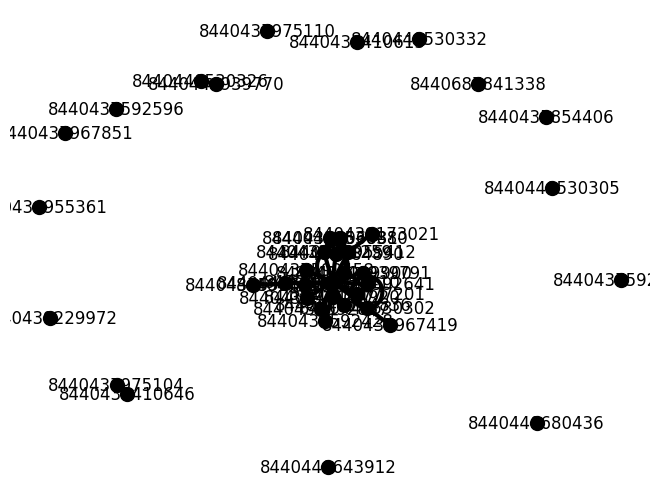

In [32]:
import matplotlib.pyplot as plt

plt.figure("Knowledge Graph")

options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

nx.draw(graph, with_labels=True, **options)

In [41]:
from pyvis.network import Network

graph_frame = Network(notebook=True)

graph_frame.from_nx(graph)
graph_frame.show_buttons(filter_=['physics'])
graph_frame.show("kg_vis.html")

kg_vis.html
